# Linear Regression Assignment




A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.



#### day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

### Step- 1 Import all required libreary and read the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import HTML, display
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#RFE
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  Understand the the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can see ther is a dteday moloum in the database it is in catagorigal coloum so let's we have to anlyse it 

In [6]:
df['dteday'].head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

In [7]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

- lets found is there any duplicate values present in the dataset or not if present then we have to drop it

In [9]:
# dropping the duplicates

df.drop_duplicates(inplace=True)

In [10]:
df.shape

(730, 16)

- there are no duplicate present 

#### Lets see how many unique values are present in a coloum


In [11]:
for column in df.columns:
    # Calculate unique value counts for each column
    unique_counts = df[column].nunique()

    # Print the results
    print(f"\nUnique counts for column '{column}': {unique_counts}")



Unique counts for column 'instant': 730

Unique counts for column 'dteday': 730

Unique counts for column 'season': 4

Unique counts for column 'year': 2

Unique counts for column 'month': 12

Unique counts for column 'holiday': 2

Unique counts for column 'weekday': 7

Unique counts for column 'workingday': 2

Unique counts for column 'weathersit': 3

Unique counts for column 'temp': 498

Unique counts for column 'atemp': 689

Unique counts for column 'humidity': 594

Unique counts for column 'windspeed': 649

Unique counts for column 'casual': 605

Unique counts for column 'registered': 678

Unique counts for column 'cnt': 695


We can see there are most of the coloums having more number of unique values except 7 coloums let's analyse these coloums

In [12]:
# sv - sort value_counts
sv=['season', 'year', 'month', 'holiday', 'weekday','workingday', 'weathersit']
for column in df[sv]:
    unique_value_counts = df[column].value_counts()

    # Print the results
    print(f"\nUnique value counts for column '{column}':")
    print(unique_value_counts)


Unique value counts for column 'season':
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

Unique value counts for column 'year':
year
0    365
1    365
Name: count, dtype: int64

Unique value counts for column 'month':
month
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

Unique value counts for column 'holiday':
holiday
0    709
1     21
Name: count, dtype: int64

Unique value counts for column 'weekday':
weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

Unique value counts for column 'workingday':
workingday
1    504
0    226
Name: count, dtype: int64

Unique value counts for column 'weathersit':
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


###  Encoding 

In [13]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Encoding/mapping the season column

df.holiday = df.holiday.map({0:'no', 1:'yes'})
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}) # use 2018 US calender 1 is mon
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Mist',3:'Light_snowrain',4:'Heavy_snowrain'})


In [14]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,no,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,no,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,no,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,no,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,no,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  dropping the unwanted columns

In [15]:
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,no,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,no,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,no,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,no,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,no,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

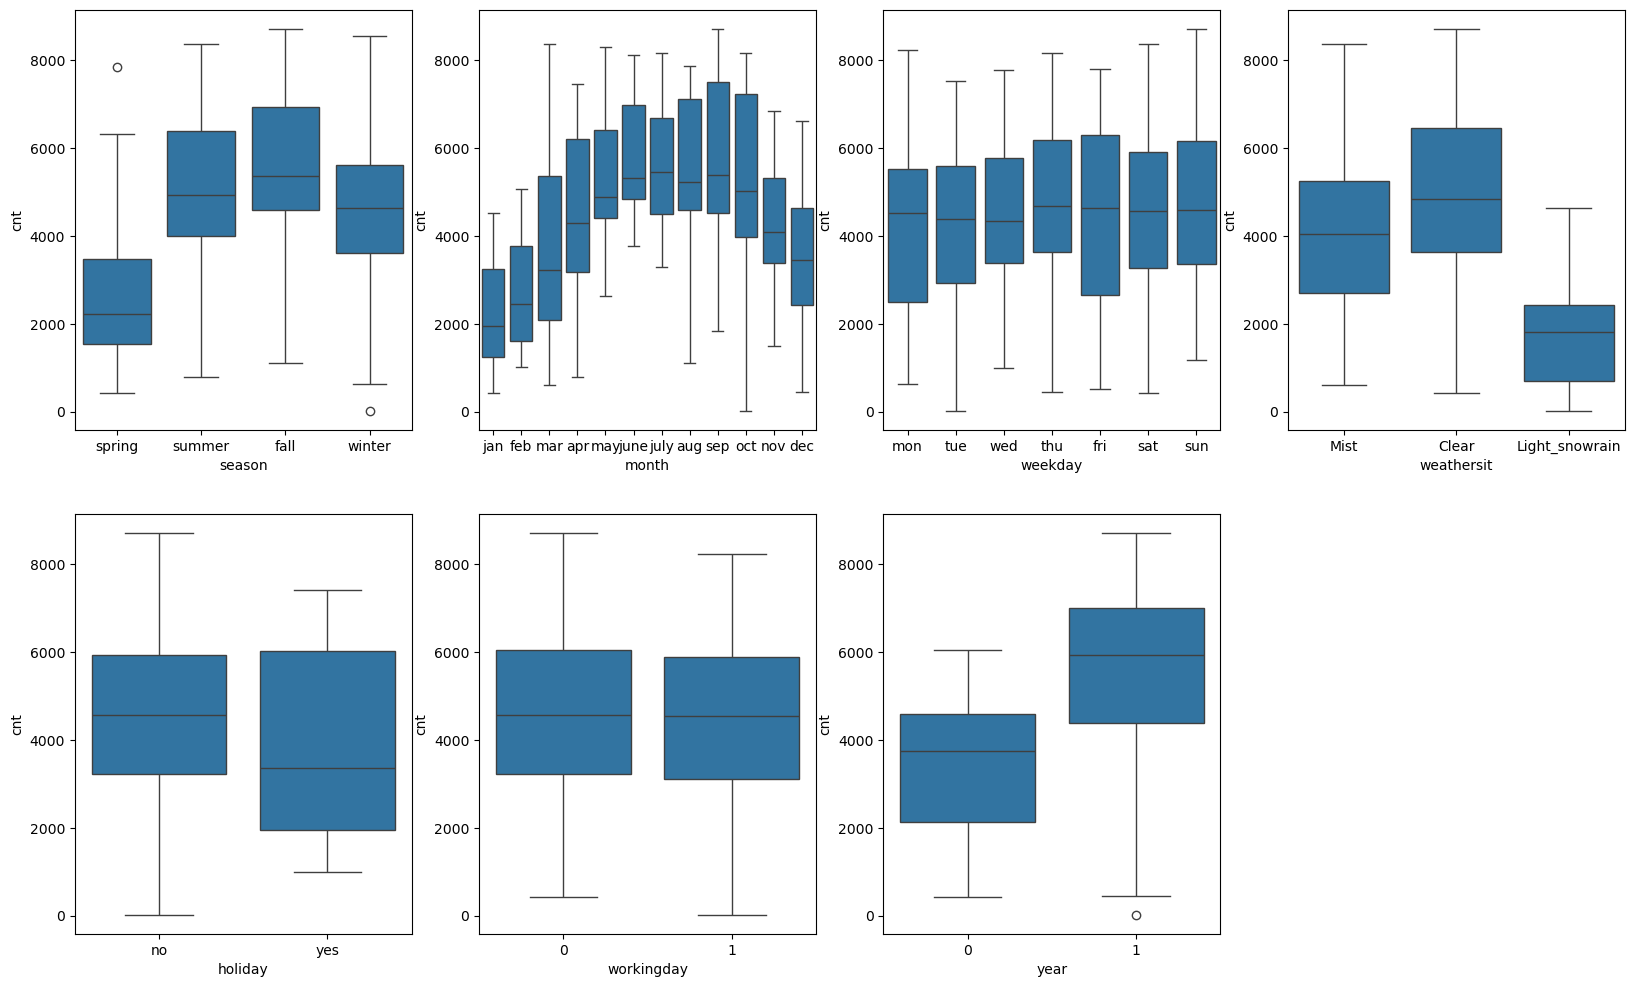

In [18]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [19]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y = 'cnt' ,data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y = 'cnt',data=df, hue=df['year'].astype(str),palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()


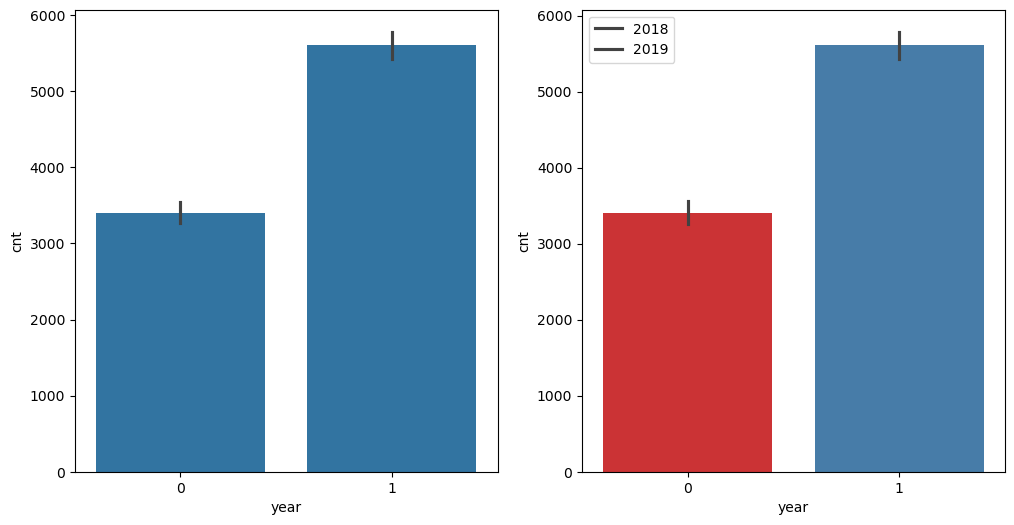

In [20]:
# plotting visualization for season column
plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

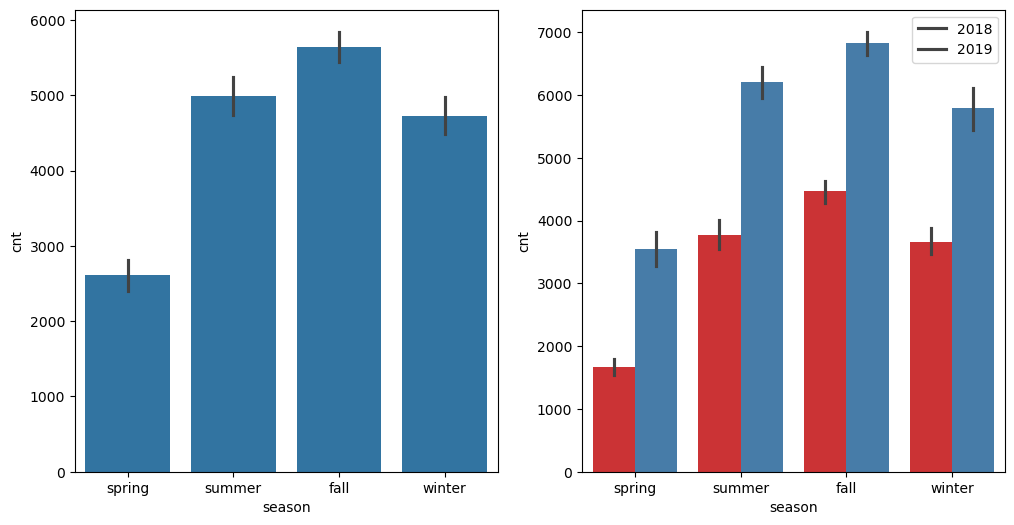

In [21]:
# plotting visualization for season column
plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

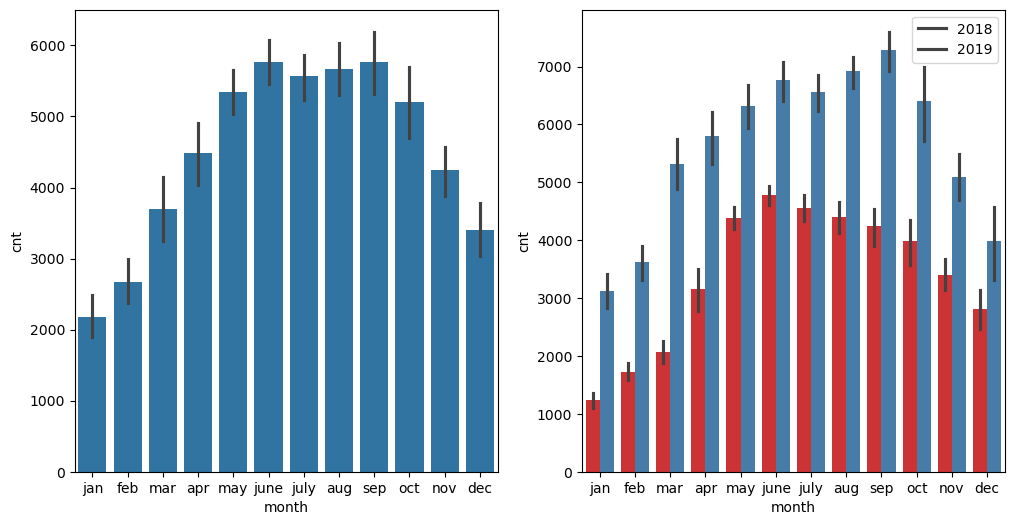

In [22]:
# plotting visualization for month column
plot_cat_columns('month')

The majority of bookings occurred in the months of May, June, July, August, September, and October. The trend indicates a rise in bookings from the beginning of the year until the middle of the year, followed by a decline towards the year's end. It's notable that the number of bookings for each month appears to have shown an increase from 2018 to 2019.

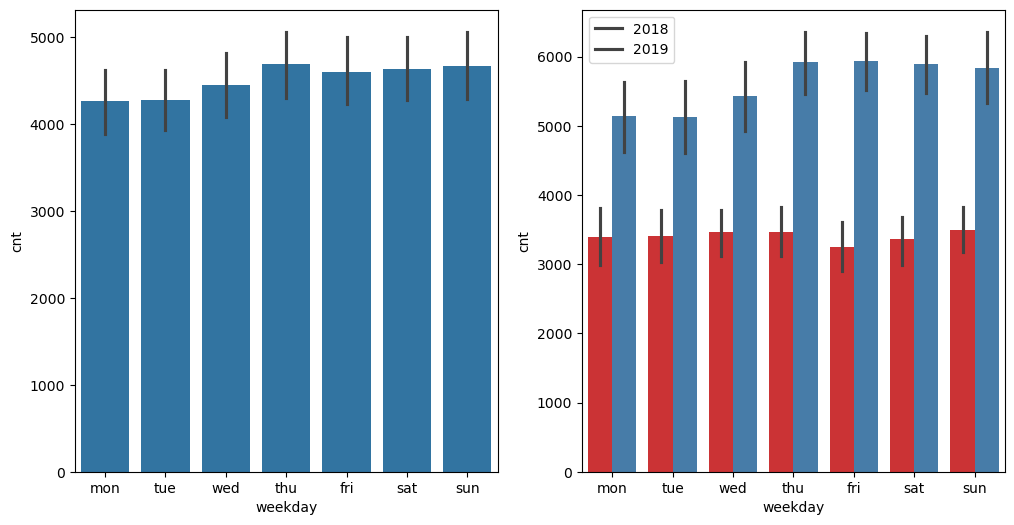

In [23]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

The increase rate is very low . nearby everyday same number of booking happend.But Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

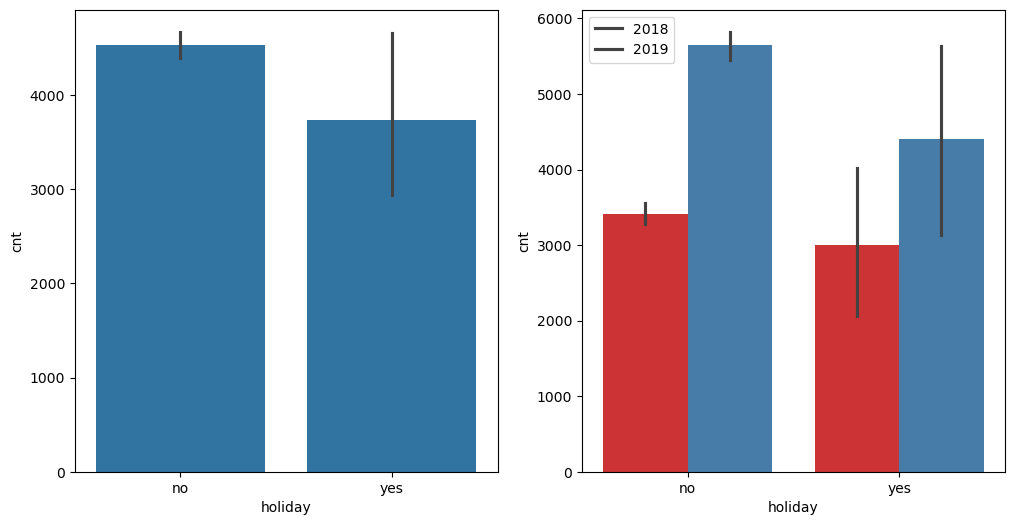

In [24]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

During non-holiday periods, there is a noticeable decrease in the number of bookings. This observation aligns with the expectation that people might prefer to spend time at home and enjoy leisure activities with their families during holidays, leading to a higher demand for bookings during those specific times.

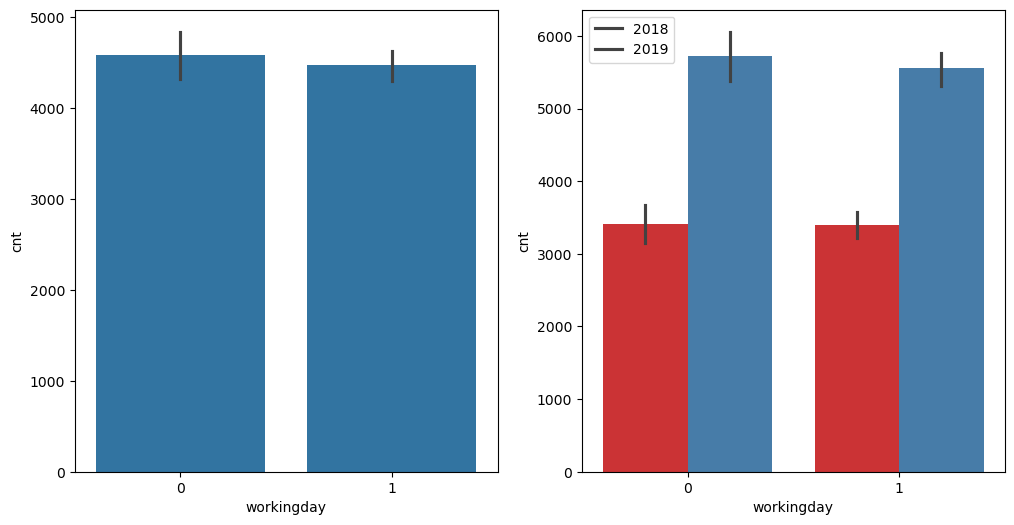

In [25]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking counts appear to be relatively consistent between working days and non-working days. However, there is a noticeable overall increase in booking counts from 2018 to 2019. This suggests a growing trend in the demand for bookings over the specified time period.

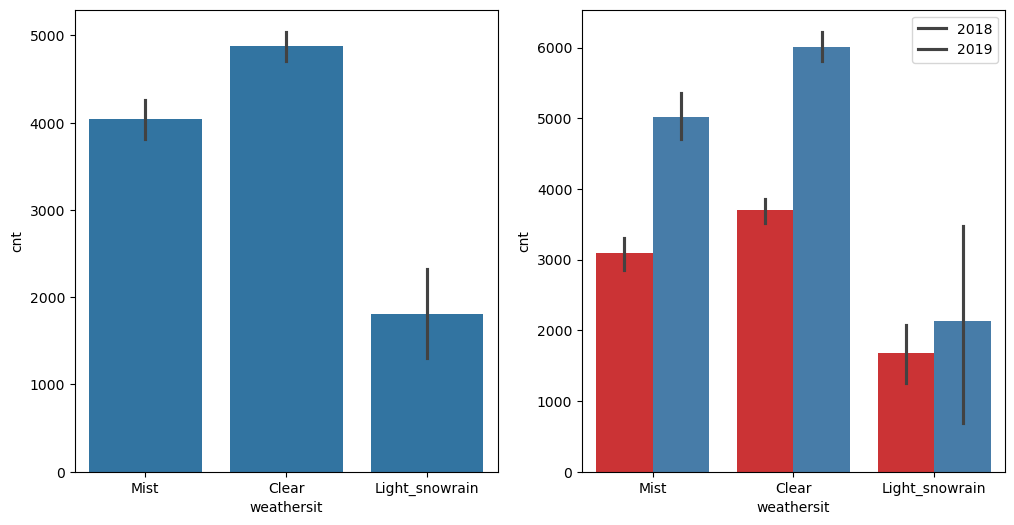

In [26]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather conditions evidently attracted more bookings, which is a logical observation. Furthermore, when comparing the two years, 2019 showed an increase in bookings for each specific weather situation in comparison to 2018. This trend implies a heightened interest or demand for bookings across various weather conditions in the later year.

### visualizing the numerical columns

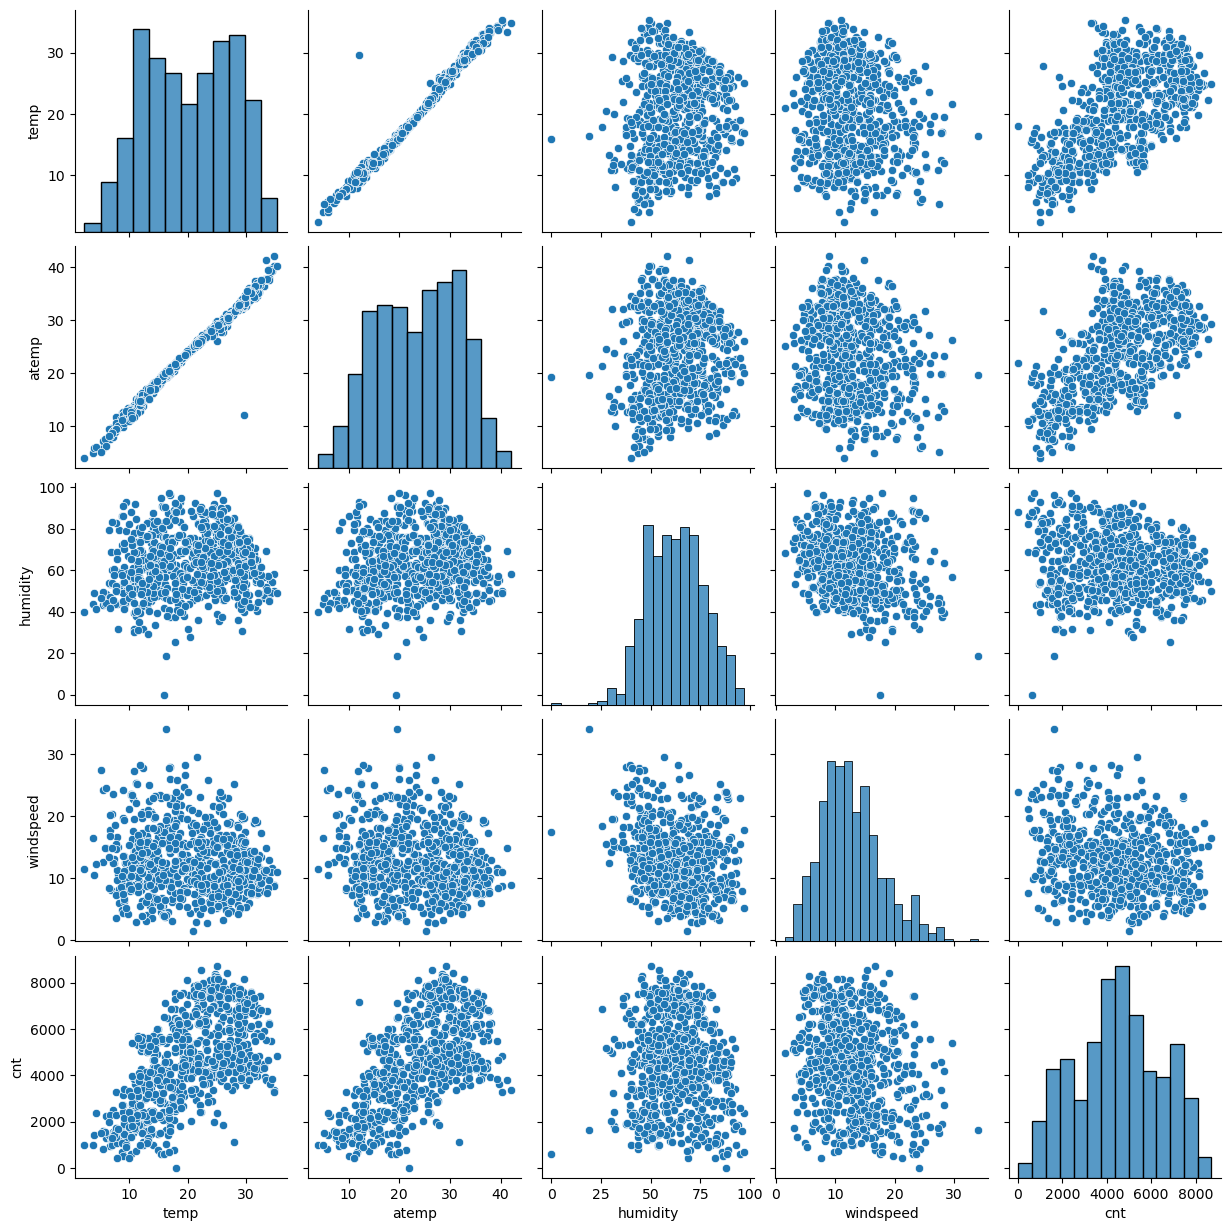

In [27]:
var=['temp','atemp','humidity','windspeed','cnt']
sns.pairplot(data=df,vars=var)
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value with respect to other variables

In [28]:
cor=df[var].corr()
cor

,temp,atemp,humidity,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


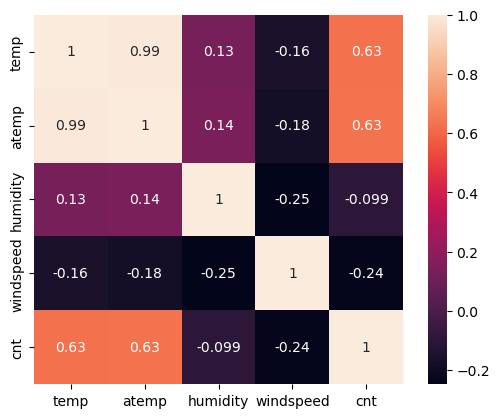

In [29]:
sns.heatmap(cor, square=True, annot=True)
plt.show()

In [30]:
# drop atemp coloum it looks temp and atemp both colinear 
df.drop(['atemp'], axis = 1, inplace = True)

## Step 3: Data Preparation

In [31]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True).astype(int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True).astype(int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True).astype(int)
seasons_df=pd.get_dummies(df.season,drop_first=True).astype(int)

In [32]:
df.holiday = df.holiday.map({'no':0, 'yes':1})

In [33]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


In [34]:
# Merging  the dataframe, with the dummy variable dataset. 

new_df = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [35]:
new_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Mist,spring,summer,winter
0,spring,0,jan,0,mon,1,Mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   humidity        730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    int64  
 12  dec             730 non-null    int64  
 13  feb             730 non-null    int64  
 14  jan             730 non-null    int64  
 15  july            730 non-null    int64  
 16  june            730 non-null    int64  
 17  mar             730 non-null    int

#### drop month,weekday,weathersit,season coloums 

In [37]:
# dropping unnecessary columns as we have already created dummy variable out of it.

new_df.drop(['month','weekday','weathersit','season'], axis = 1, inplace = True)

In [38]:
new_df.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Mist,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    int64  
 8   dec             730 non-null    int64  
 9   feb             730 non-null    int64  
 10  jan             730 non-null    int64  
 11  july            730 non-null    int64  
 12  june            730 non-null    int64  
 13  mar             730 non-null    int64  
 14  may             730 non-null    int64  
 15  nov             730 non-null    int64  
 16  oct             730 non-null    int64  
 17  sep             730 non-null    int

In [40]:
new_df.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Mist,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,...,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,...,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4: Model Building and Eval

In [41]:
# Scaling
scaler = MinMaxScaler()
var = ['temp','humidity','windspeed','cnt']
new_df[var] = scaler.fit_transform(new_df[var])

In [42]:
new_df.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Mist,spring,summer,winter
0,0,0,1,0.355170,0.828620,0.284606,0.110792,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,0.379232,0.715771,0.466215,0.089623,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,0.171000,0.449638,0.465740,0.152669,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,0.175530,0.607131,0.284297,0.177174,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0.209120,0.449313,0.339143,0.181546,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [43]:
X = new_df.drop('cnt',axis=1)
y = new_df['cnt']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
regressor.coef_

array([ 0.23264144, -0.10250098, -0.04176126,  0.43512707, -0.17471676,
       -0.17620649, -0.03084118, -0.06107818, -0.03848236, -0.05225416,
       -0.08740621, -0.00894397,  0.01267687,  0.02108515, -0.07222166,
       -0.00774812,  0.03747105, -0.0125777 , -0.03370545, -0.03062874,
        0.01011058, -0.02695234, -0.01370803, -0.22681774, -0.05006954,
       -0.10593802, -0.00754472,  0.07671246])

In [47]:
regressor.intercept_

0.44024129631927045

In [48]:
# Get the coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Display the results in HTML
html_output = f"""
<h2>Linear Regression Results:</h2>
<p><strong>Coefficients:</strong> {coefficients}</p>
<p><strong>Intercept:</strong> {intercept}</p>
"""

display(HTML(html_output))

In [49]:
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
year,0.232641
holiday,-0.102501
workingday,-0.041761
temp,0.435127
humidity,-0.174717
windspeed,-0.176206
aug,-0.030841
dec,-0.061078
feb,-0.038482
jan,-0.052254


In [50]:
y_pred = regressor.predict(X_test)

In [51]:
df = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_pred
})
df

,Actual,Predicted
566,0.510469,0.394197
374,0.411413,0.442203
181,0.614358,0.581550
529,0.844570,0.747726
233,0.544869,0.520049
...,...,...
6,0.171192,0.133092
705,0.573631,0.570039
261,0.519673,0.466915
579,0.822941,0.755749


In [52]:
# Evaluation
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred))) 
print(r2_score(y_test, y_pred)) 

0.06476307334479504
0.007355472287264305
0.08576405008664356
0.841295769215168


In [53]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 7),
 ('mar', False, 5),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 6),
 ('tue', True, 1),
 ('wed', False, 3),
 ('Light_snowrain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1)]

In [55]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,year,holiday,workingday,temp,humidity,windspeed,dec,feb,jan,july,may,nov,sep,sat,sun,tue,Light_snowrain,Mist,spring,winter
176,0,0,1,0.773634,0.527849,0.148724,0,0,0,0,0,0,0,0,0,1,0,0,0,0
172,0,0,1,0.840090,0.727506,0.308966,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142,0,0,1,0.713409,0.832905,0.435916,0,0,0,0,1,0,0,0,0,0,0,1,0,0
237,0,0,0,0.798555,0.782776,0.126931,0,0,0,0,0,0,0,0,1,0,0,0,0,0
531,1,0,0,0.713409,0.518424,0.297431,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Building a linear model

In [56]:
# def build_model(X,y):
#     X = sm.add_constant(X) #Adding the constant
#     lm_sm = sm.OLS(y,X).fit() # fitting the model
#     print(lm_sm.summary()) # model summary
#     y_pred = lm_sm.predict(X)
#     return X, y_pred
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [57]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     153.6
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          7.52e-213
Time:                        19:52:41   Log-Likelihood:                 589.00
No. Observations:                 584   AIC:                            -1136.
Df Residuals:                     563   BIC:                            -1044.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4347      0.066      6.

In [58]:
# Run the function to calculate VIF for the new model
checkVIF(X_train_rfe)

,Features,VIF
4,humidity,38.14
2,workingday,36.46
3,temp,22.24
14,sun,7.79
13,sat,7.69
5,windspeed,6.56
18,spring,4.81
19,winter,3.15
17,Mist,2.43
8,jan,2.40


In [59]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

In [60]:
checkVIF(X_train_new)

,Features,VIF
2,workingday,24.44
3,temp,19.71
4,windspeed,6.16
12,sat,5.57
13,sun,5.56
17,spring,4.77
18,winter,3.07
7,jan,2.38
6,feb,2.10
0,year,2.00


In [61]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          9.29e-209
Time:                        19:52:41   Log-Likelihood:                 576.53
No. Observations:                 584   AIC:                            -1113.
Df Residuals:                     564   BIC:                            -1026.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3479      0.065      5.

In [62]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [63]:
checkVIF(X_train_new)

,Features,VIF
2,temp,5.89
3,windspeed,5.02
16,spring,4.09
17,winter,2.68
6,jan,2.19
5,feb,2.06
0,year,1.99
9,nov,1.87
4,dec,1.60
15,Mist,1.56


In [64]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     162.6
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          9.29e-210
Time:                        19:52:41   Log-Likelihood:                 576.26
No. Observations:                 584   AIC:                            -1115.
Df Residuals:                     565   BIC:                            -1031.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3045      0.025     12.

In [65]:
# We can drop may variable as it has high p-value
X_train_new = X_train_new.drop(['may'], axis = 1)

# Run the function to calculate VIF for the new model
checkVIF(X_train_new)

,Features,VIF
2,temp,5.47
3,windspeed,5.02
15,spring,4.01
16,winter,2.60
6,jan,2.19
5,feb,2.06
0,year,1.99
8,nov,1.87
4,dec,1.60
14,Mist,1.55


In [66]:
# We can drop sat & sun variable as it has high p-value
X_train_new = X_train_new.drop(['sat','sun'], axis = 1)

# Run the function to calculate VIF for the new model
checkVIF(X_train_new)

,Features,VIF
2,temp,5.28
3,windspeed,4.97
13,spring,4.00
14,winter,2.59
6,jan,2.19
5,feb,2.05
0,year,1.99
8,nov,1.86
4,dec,1.60
12,Mist,1.54


In [67]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     194.2
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          3.88e-212
Time:                        19:52:41   Log-Likelihood:                 573.79
No. Observations:                 584   AIC:                            -1116.
Df Residuals:                     568   BIC:                            -1046.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3143      0.024     12.

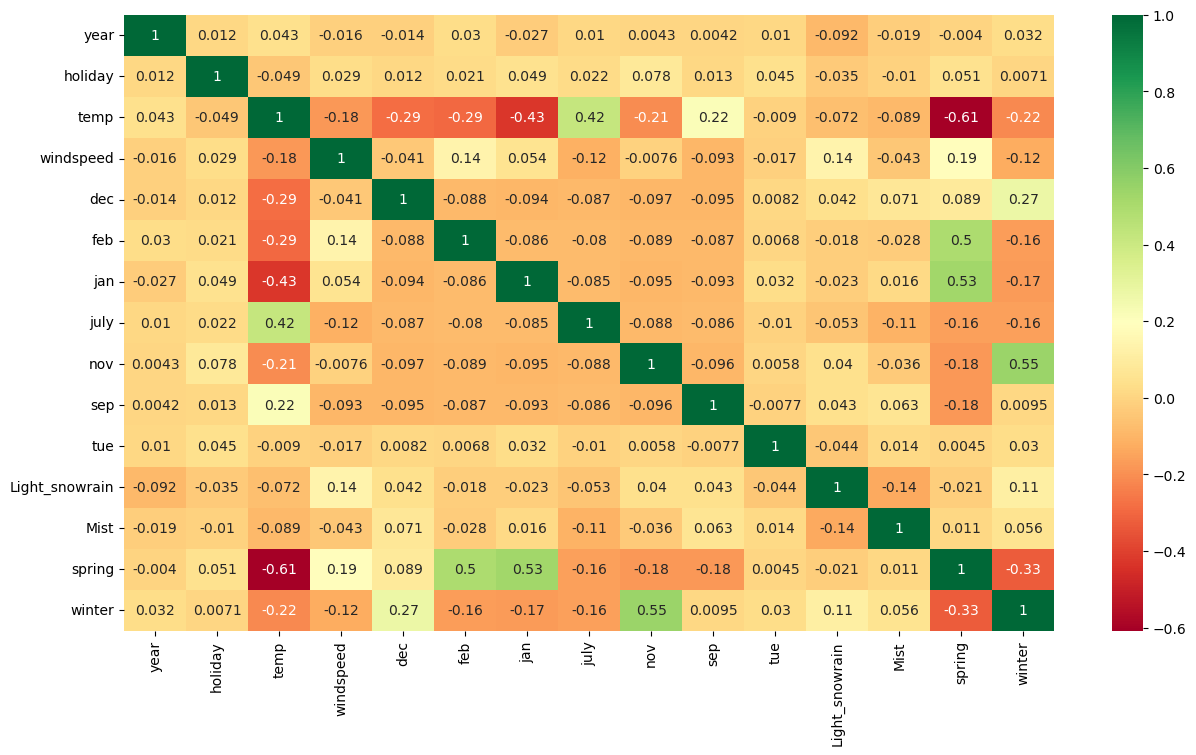

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [69]:
# We can drop nov,jan,feb & july variable as it has high corelation
X_train_new = X_train_new.drop(['nov','jan','feb','july'], axis = 1)

# Run the function to calculate VIF for the new model
checkVIF(X_train_new)

,Features,VIF
3,windspeed,4.70
2,temp,4.14
0,year,1.99
9,spring,1.81
10,winter,1.58
8,Mist,1.53
4,dec,1.25
5,sep,1.17
6,tue,1.15
7,Light_snowrain,1.12


VIF value now seems to be good as it came below 5. 

In [70]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 02 Jan 2024   Prob (F-statistic):          2.62e-207
Time:                        19:52:42   Log-Likelihood:                 551.13
No. Observations:                 584   AIC:                            -1078.
Df Residuals:                     572   BIC:                            -1026.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2877      0.023     12.

We can cosider the above model i.e X_train_lm_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 242.9 (which is greater than 1) and the p-value of 2.62e-207 i.e almost equals to zero, states that the overall model is significant

In [71]:
# Checking the parameters and their coefficient values
lr_5.params

const             0.287659
year              0.239387
holiday          -0.087495
temp              0.387764
windspeed        -0.130338
dec              -0.030996
sep               0.056357
tue              -0.029940
Light_snowrain   -0.275187
Mist             -0.070816
spring           -0.126603
winter            0.046378
dtype: float64

In [72]:
X_train_lm_5

,const,year,holiday,temp,windspeed,dec,sep,tue,Light_snowrain,Mist,spring,winter
176,1.0,0,0,0.773634,0.148724,0,0,1,0,0,0,0
172,1.0,0,0,0.840090,0.308966,0,0,0,0,0,0,0
142,1.0,0,0,0.713409,0.435916,0,0,0,0,1,0,0
237,1.0,0,0,0.798555,0.126931,0,0,0,0,0,0,0
531,1.0,1,0,0.713409,0.297431,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,1,0,0.257562,0.221813,0,0,0,0,0,1,0
320,1.0,0,0,0.352054,0.583358,0,0,0,0,1,0,1
527,1.0,1,0,0.740406,0.396136,0,0,0,0,1,0,0
125,1.0,0,0,0.523386,0.424379,0,0,0,0,0,0,0


In [73]:
y_train_pred = lr_5.predict(X_train_lm_5)

### Normality of error terms

Text(0.5, 0, 'Errors')

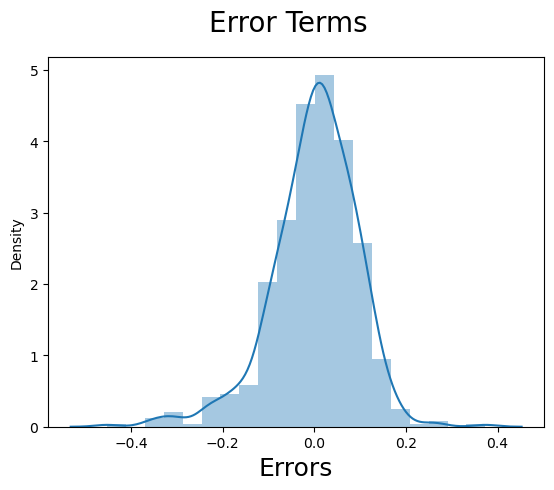

In [74]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

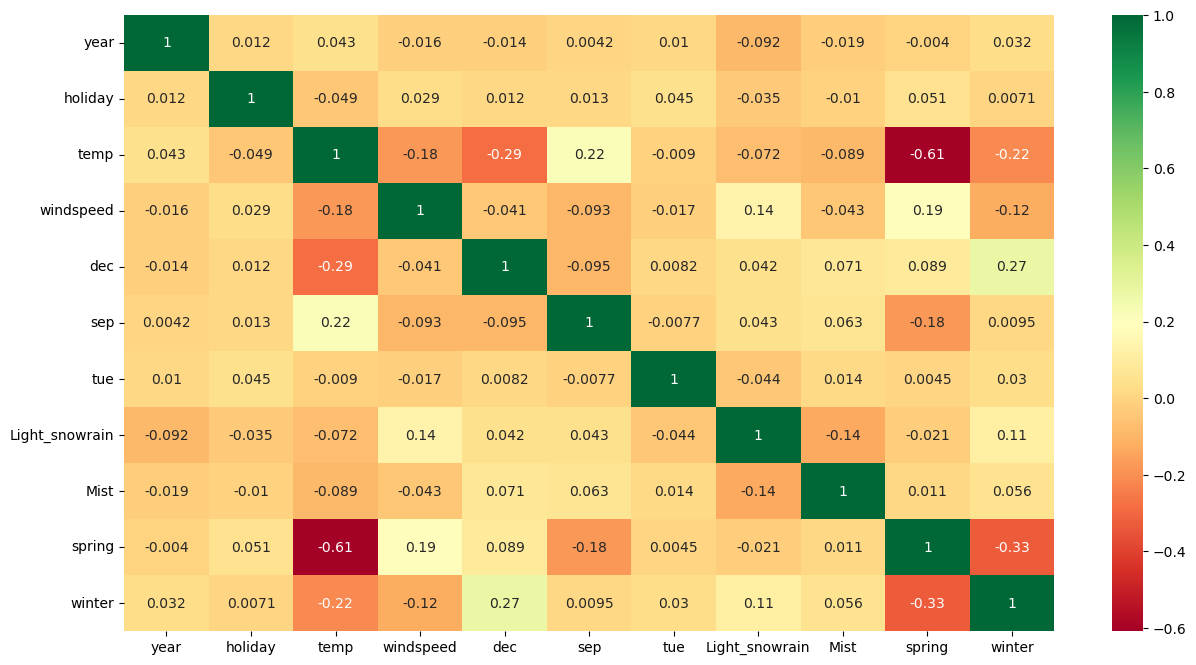

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity

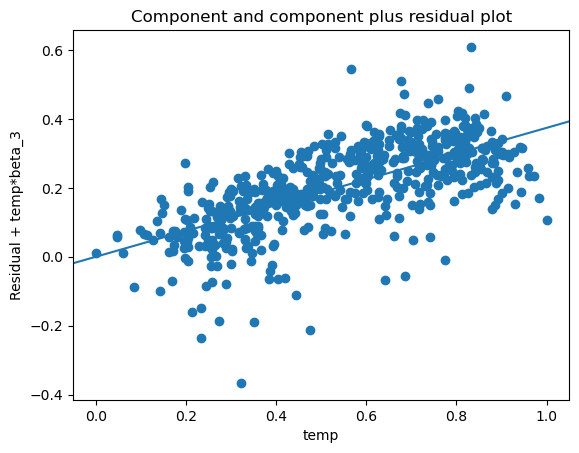

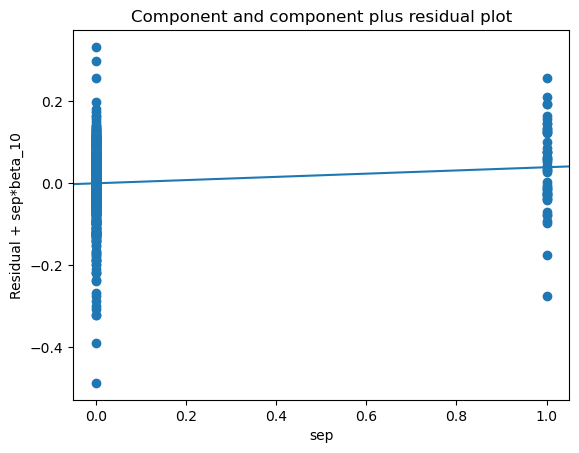

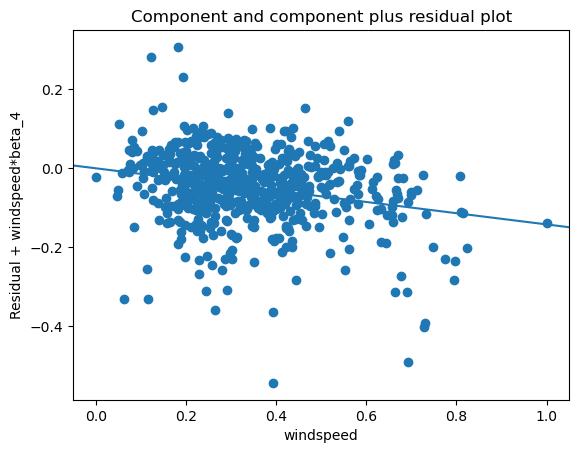

In [76]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

### Homoscedasticity

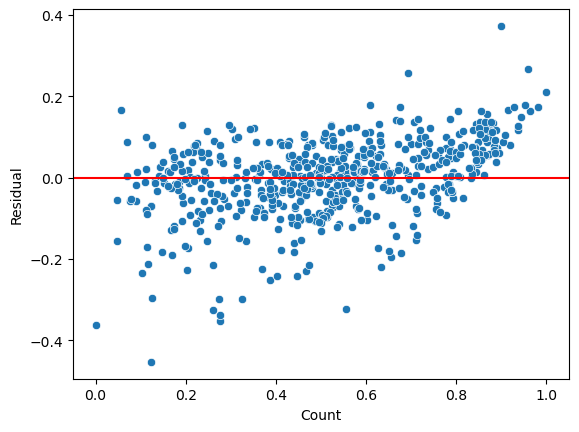

In [77]:
# Calculate residuals
residuals = y_train - y_train_pred

# Create a scatter plot of y_train vs residuals
sns.scatterplot(x=y_train, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### Independence of residuals
Durbin-Watson value of final model lr_5 is 2.098, which signifies there is no autocorrelation.

## Making Predictions Using the Final Model


In [78]:
X_test.head()

,year,holiday,workingday,temp,humidity,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,Light_snowrain,Mist,spring,summer,winter
566,1,0,0,0.668758,0.889889,0.393568,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
374,1,0,1,0.310971,0.664804,0.340487,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
181,0,0,0,0.826591,0.407455,0.165370,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
529,1,0,1,0.734175,0.585689,0.476922,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
233,0,0,1,0.788172,0.483290,0.524373,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
y_test

566    0.510469
374    0.411413
181    0.614358
529    0.844570
233    0.544869
         ...   
6      0.171192
705    0.573631
261    0.519673
579    0.822941
381    0.335136
Name: cnt, Length: 146, dtype: float64

In [80]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [81]:
y_pred = lr_5.predict(X_test_lm_5)

In [82]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8293

## Model Evaluation


Let's now plot the graph for actual versus predicted values.

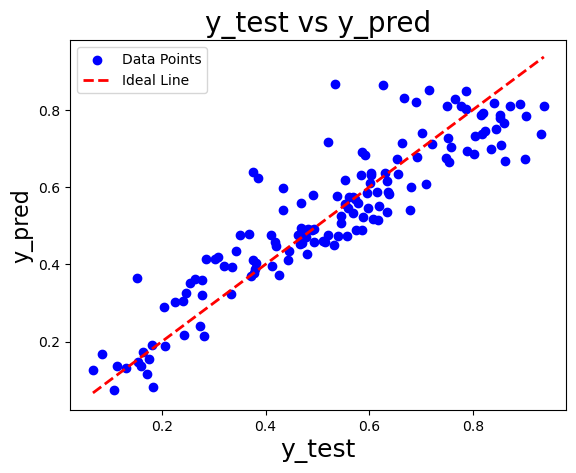

In [83]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_pred, c='blue', label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal Line')

plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.legend()
plt.show()


In [84]:
round(lr_5.params,4)


const             0.2877
year              0.2394
holiday          -0.0875
temp              0.3878
windspeed        -0.1303
dec              -0.0310
sep               0.0564
tue              -0.0299
Light_snowrain   -0.2752
Mist             -0.0708
spring           -0.1266
winter            0.0464
dtype: float64

We can see that the equation of our best fitted line is: 

Predicted Count = 0.2877 + (0.2394 * {year}) - (0.0875 * {holiday}) + (0.3878 * {temp}) - (0.1303 * {windspeed}) - (0.0310 * {dec}) + (0.0564 * {sep}) - (0.0299 * {tue}) - (0.2752 * {Light_snowrain}) - (0.0708 * {Mist}) - (0.1266 * {spring}) + (0.0464 * {winter})

In [85]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8152


Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.824
- Test dataset R^2           : 0.829
- Train dataset Adjusted R^2 : 0.820    
- Test dataset Adjusted R^2  : 0.815

### Business Recommendation

- high demand of bikes depends in year,temp,sep,winter and 
- less demand of bikes depends in holiday,windspeed,Light_snowrain,Misty,spring,summer